<a href="https://colab.research.google.com/github/visaasmara/Skripsi/blob/main/APRIL_SKRIPSI_OUTLIER_%26_NORMALISASI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Data Preparation**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

#Read Data
transaksi = pd.read_excel('/content/drive/MyDrive/Data Koperasi/data_penjualan_april.xlsx', header = 0, usecols = 'B,C,D,E,I')

#Preview Data
transaksi

Mounted at /content/drive


,TANGGAL,STRUK,KODE BARANG,NAMA BARANG,SUBTOTAL
0,2023-04-01,1623,15,TUTUP GELAS STENLIS BSR,30000
1,2023-04-01,1119,28,MY JELLY 1KG,51000
2,2023-04-01,903,28,MY JELLY 1KG,25500
3,2023-04-01,2057,28,MY JELLY 1KG,25500
4,2023-04-01,1104,28,MY JELLY 1KG,25500
...,...,...,...,...,...
32810,2023-04-30,1932,9555135303812,SILCORO BENING,26000
32811,2023-04-30,808,9555135303812,SILCORO BENING,26000
32812,2023-04-30,1045,9556001670700,KIT KAT 35GR,8500
32813,2023-04-30,1908,9556001978400,CERE KCG IHJAU 120g,10700


In [2]:
#Info of Data
transaksi.info()

#Description of Data
transaksi.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32815 entries, 0 to 32814
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TANGGAL      32815 non-null  datetime64[ns]
 1   STRUK        32815 non-null  int64         
 2   KODE BARANG  32815 non-null  object        
 3   NAMA BARANG  32815 non-null  object        
 4   SUBTOTAL     32815 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.3+ MB


,TANGGAL,STRUK,SUBTOTAL
count,32815,32815.000000,3.281500e+04
mean,2023-04-13 18:38:54.761541888,1452.411519,1.853127e+04
min,2023-04-01 00:00:00,700.000000,0.000000e+00
25%,2023-04-07 00:00:00,1040.000000,5.200000e+03
50%,2023-04-14 00:00:00,1505.000000,1.050000e+04
75%,2023-04-20 00:00:00,1847.000000,2.100000e+04
max,2023-04-30 00:00:00,2137.000000,7.937500e+06
std,NaN,416.573106,5.634489e+04


### **2. Penanganan Missing Value**

In [3]:
#Check Missing Value
transaksi.isnull()
transaksi.isnull().sum()

TANGGAL        0
STRUK          0
KODE BARANG    0
NAMA BARANG    0
SUBTOTAL       0
dtype: int64

In [4]:
#Drop Row with Missing Value
transaksi = transaksi.dropna()
transaksi.shape

(32815, 5)

### **3. Perhitungan RFM**

### Recency

In [5]:
transaksi['KODE BARANG'] = transaksi['KODE BARANG'].astype("string")
rfm_r = transaksi.groupby(by='KODE BARANG',
						as_index=False)['TANGGAL'].max()
rfm_r.columns = ['KODE BARANG', 'LastPurchaseDate']
recent_date = rfm_r['LastPurchaseDate'].max()
rfm_r['Recency'] = rfm_r['LastPurchaseDate'].apply(
	lambda x: (recent_date - x).days)
rfm_r.sort_values(by='KODE BARANG', ascending=True)

,KODE BARANG,LastPurchaseDate,Recency
0,0,2023-04-28,2
1,1,2023-04-26,4
2,100004,2023-04-21,9
3,100008,2023-04-19,11
4,1003,2023-04-30,0
...,...,...,...
6461,9902,2023-04-30,0
6462,999,2023-04-12,18
6463,99997,2023-04-20,10
6464,CABRP.23.900,2023-04-16,14


### Frequency

In [6]:
#Calculate The Frequency
transaksi['STRUK'] = transaksi['STRUK'].astype("string")
rfm_f = transaksi.groupby(
    by=['KODE BARANG'], as_index=False)['STRUK'].count()
rfm_f.columns = ['KODE BARANG', 'Frequency']
rfm_f['Frequency'] = rfm_f['Frequency'].astype("int")
rfm_f.sort_values(by='KODE BARANG', ascending=True)

,KODE BARANG,Frequency
0,0,2
1,1,2
2,100004,15
3,100008,20
4,1003,79
...,...,...
6461,9902,1
6462,999,1
6463,99997,3
6464,CABRP.23.900,2


### Monetary

In [7]:
# Calculate The Monetary
transaksi['Monetary'] = transaksi['SUBTOTAL']
rfm_m = transaksi.groupby('KODE BARANG')['Monetary'].sum()
rfm_m = rfm_m.reset_index()
rfm_m['Monetary'] = rfm_m['Monetary'].astype("int")
rfm_m.sort_values(by='KODE BARANG', ascending=True)

,KODE BARANG,Monetary
0,0,21000
1,1,23000
2,100004,162000
3,100008,330000
4,1003,1452300
...,...,...
6461,9902,10000
6462,999,69000
6463,99997,10500
6464,CABRP.23.900,33000


### Merging RFM

In [8]:
rfm_rf = pd.merge(rfm_r,rfm_f, on='KODE BARANG', how='inner').drop(
     columns='LastPurchaseDate')
# rfm_rf = pd.merge(rfm_r, rfm_f, on='KODE BARANG', how='inner')
rfm_rf.columns = ['KODE BARANG','Recency', 'Frequency']
rfm_rfm = rfm_rf.merge(rfm_m, on='KODE BARANG', how='inner')
rfm_rfm.columns = ['KODE BARANG','Recency', 'Frequency', 'Monetary']
rfm_rfm

,KODE BARANG,Recency,Frequency,Monetary
0,0,2,2,21000
1,1,4,2,23000
2,100004,9,15,162000
3,100008,11,20,330000
4,1003,0,79,1452300
...,...,...,...,...
6461,9902,0,1,10000
6462,999,18,1,69000
6463,99997,10,3,10500
6464,CABRP.23.900,14,2,33000


In [9]:
rfm_rfm.describe()

,Recency,Frequency,Monetary
count,6466.000000,6466.000000,6.466000e+03
mean,10.839468,5.075008,9.404633e+04
std,8.553018,8.593174,3.344547e+05
min,0.000000,1.000000,3.500000e+02
25%,2.000000,1.000000,1.700000e+04
50%,10.000000,3.000000,3.480000e+04
75%,17.000000,5.000000,7.700000e+04
max,29.000000,159.000000,1.333500e+07


### **4. Penanganan Outlier**



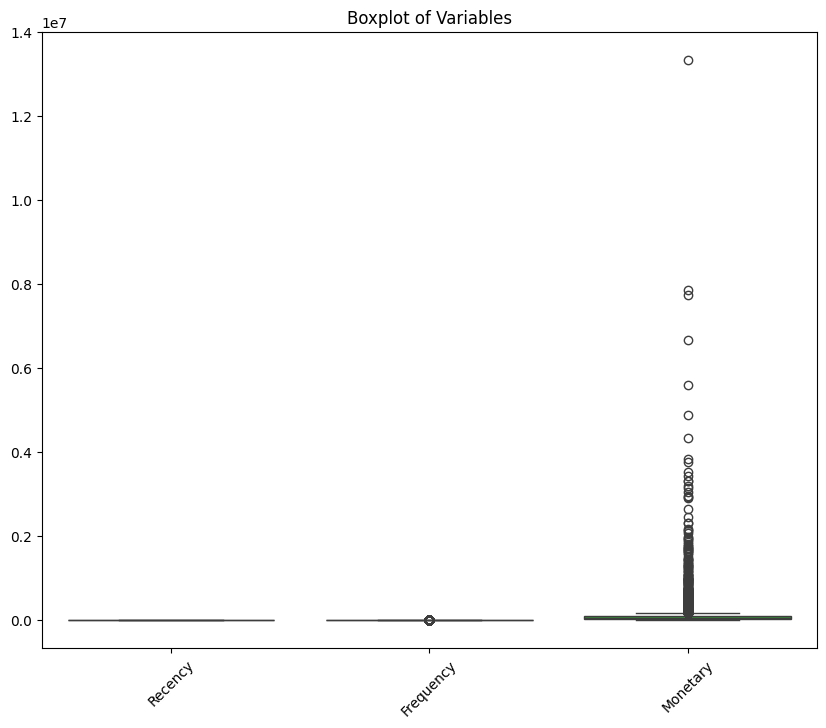

In [10]:
#Check Outlier

import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

rfm = rfm_rfm[['Recency','Frequency', 'Monetary']]
rfmclean = rfm.copy()

plt.figure(figsize=(10, 8))
sns.boxplot(data=rfmclean)
plt.title('Boxplot of Variables')
plt.xticks(rotation=45)  #rotasi label
plt.show()

In [11]:
def handle_outliers(rfmclean):
    data_handled = rfmclean.copy()
    for column in ['Recency', 'Frequency', 'Monetary']:
        q1 = data_handled[column].quantile(0.25)
        q3 = data_handled[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        data_handled[column] = np.where(data_handled[column] < lower_bound, lower_bound,
                                        np.where(data_handled[column] > upper_bound, upper_bound,
                                        data_handled[column]))
    return data_handled

# Handle outlier
data_handled = handle_outliers(rfmclean)

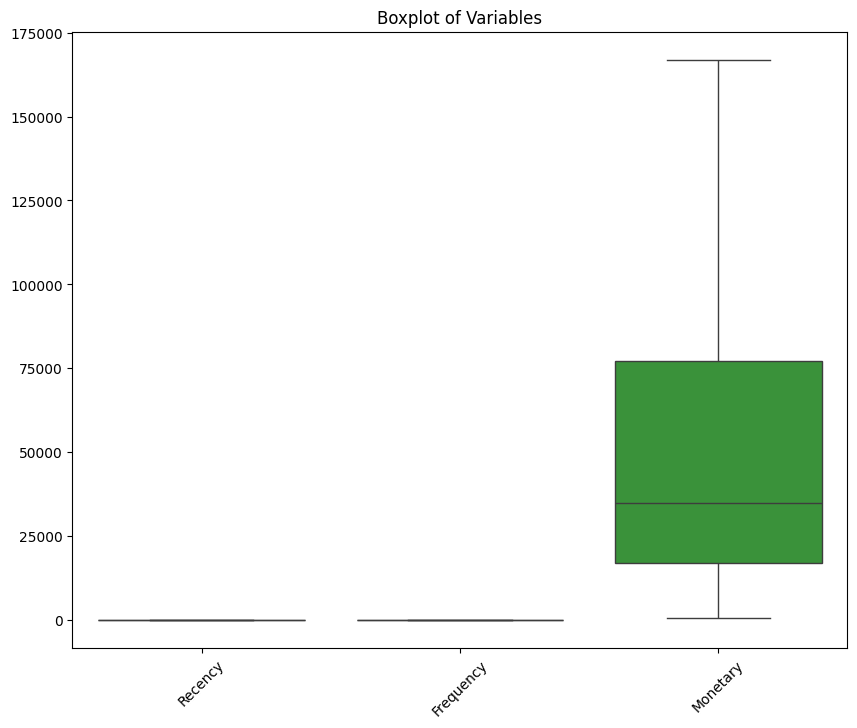

In [12]:
# Visualisasi hasil penanganan outlier
plt.figure(figsize=(10, 8))
sns.boxplot(data=data_handled)
plt.title('Boxplot of Variables')
plt.xticks(rotation=45)  #rotasi label
plt.show()

### **5. Normalisasi Nilai RFM**

In [13]:
import sklearn
from sklearn.preprocessing import StandardScaler

# Instantiate
scaler = StandardScaler()

# fit_transform
rfmscaled = scaler.fit_transform(data_handled)
rfmscaled.shape

rfmscaled = pd.DataFrame(rfmscaled)
rfmscaled.columns = ['Recency','Frequency', 'Monetary']
rfmscaled.head()


,Recency,Frequency,Monetary
0,-1.033571,-0.561422,-0.670155
1,-0.799717,-0.561422,-0.630611
2,-0.215083,2.174418,2.117688
3,0.018771,2.174418,2.216548
4,-1.267425,2.174418,2.216548


<Axes: >

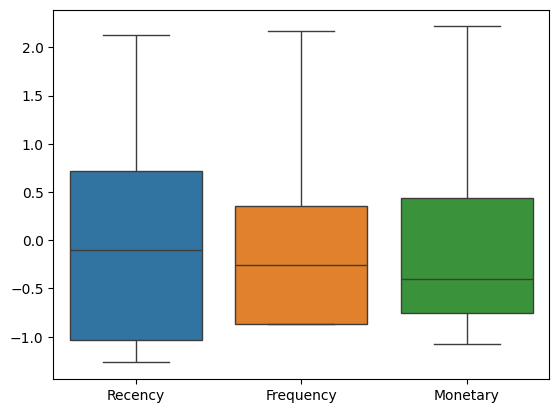

In [14]:
sns.boxplot(rfmscaled)

### **5. K-Means Clustering**

### Elbow Method : Find K

In [15]:
rfm

,Recency,Frequency,Monetary
0,2,2,21000
1,4,2,23000
2,9,15,162000
3,11,20,330000
4,0,79,1452300
...,...,...,...
6461,0,1,10000
6462,18,1,69000
6463,10,3,10500
6464,14,2,33000


In [16]:
rfmscaled

,Recency,Frequency,Monetary
0,-1.033571,-0.561422,-0.670155
1,-0.799717,-0.561422,-0.630611
2,-0.215083,2.174418,2.117688
3,0.018771,2.174418,2.216548
4,-1.267425,2.174418,2.216548
...,...,...,...
6461,-1.267425,-0.865404,-0.887646
6462,0.837258,-0.865404,0.278898
6463,-0.098156,-0.257440,-0.877760
6464,0.369551,-0.561422,-0.432892


In [17]:
# Elbow-curve/SSD
from sklearn.cluster import KMeans

ssd = []
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfmscaled)

    ssd.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(random_state=50), k=(1, 9),
                 timings=False)

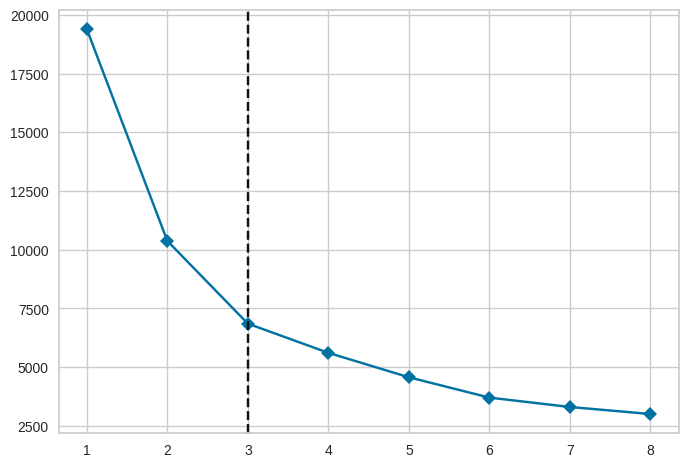

In [18]:
# Elbow-curve/SSD
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', random_state=50)

from yellowbrick.cluster import KElbowVisualizer

elbowmethod = KElbowVisualizer(kmeans,k=(1,9),timings=False)
elbowmethod.fit(rfmscaled)
elbowmethod

In [19]:
ssd

[19397.999999999945,
 10379.14181541575,
 6855.525932864537,
 5612.142027076812,
 4572.434818151782,
 3706.07849070905,
 3307.0835891707234,
 3007.8806740630857]

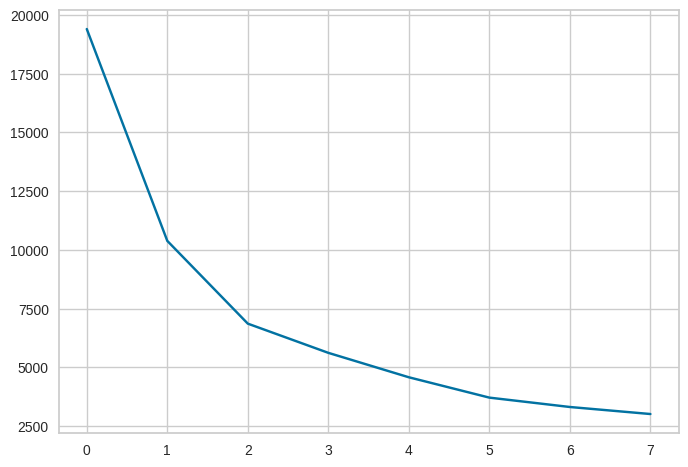

In [20]:
import matplotlib.pyplot as plt
plt.plot(ssd)

### Silhouette Coefficient

In [21]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfmscaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfmscaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the silhouette score is 0.4540149389201097


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, the silhouette score is 0.38692503855530863


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, the silhouette score is 0.37300517158897856


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, the silhouette score is 0.3957559529810234


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, the silhouette score is 0.3831585922710761


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, the silhouette score is 0.38483679481175875


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, the silhouette score is 0.388838680297928


### Clustering

In [22]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfmscaled)

kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [23]:
rfmscaled['Cluster'] = kmeans.labels_
rfmscaled

,Recency,Frequency,Monetary,Cluster
0,-1.033571,-0.561422,-0.670155,0
1,-0.799717,-0.561422,-0.630611,0
2,-0.215083,2.174418,2.117688,1
3,0.018771,2.174418,2.216548,1
4,-1.267425,2.174418,2.216548,1
...,...,...,...,...
6461,-1.267425,-0.865404,-0.887646,0
6462,0.837258,-0.865404,0.278898,3
6463,-0.098156,-0.257440,-0.877760,0
6464,0.369551,-0.561422,-0.432892,0


In [24]:
# assign the label
rfm['Cluster'] = kmeans.labels_
rfm.columns = ['Recency', 'Frequency', 'Monetary', 'Cluster']
final = pd.concat([rfm_rfm, rfm['Cluster']], axis=1)  # Menggabungkan secara vertikal dengan concat
result = pd.merge(final, transaksi[['KODE BARANG', 'NAMA BARANG']], on='KODE BARANG', how='left')
df = pd.DataFrame(result)
result

,KODE BARANG,Recency,Frequency,Monetary,Cluster,NAMA BARANG
0,0,2,2,21000,0,KAOS KK MEIYSMP REMAJA
1,0,2,2,21000,0,KAOS KK MEIYSMP REMAJA
2,1,4,2,23000,0,KAOS KK TIFA MUSLIM S.M.L
3,1,4,2,23000,0,KAOS KK TIFA MUSLIM S.M.L
4,100004,9,15,162000,1,LIPSTIK SKIVA
...,...,...,...,...,...,...
32810,99997,10,3,10500,0,KONEKTOR MASKER STRAP
32811,CABRP.23.900,14,2,33000,0,KAOS KAKI BARBELS KANTOR
32812,CABRP.23.900,14,2,33000,0,KAOS KAKI BARBELS KANTOR
32813,X7251,1,2,22000,0,KAOS KK BABY SUPER ISI 2


      Recency  Frequency  Monetary  Cluster
0           2          2     21000        0
1           4          2     23000        0
2           9         15    162000        1
3          11         20    330000        1
4           0         79   1452300        1
...       ...        ...       ...      ...
6461        0          1     10000        0
6462       18          1     69000        3
6463       10          3     10500        0
6464       14          2     33000        0
6465        1          2     22000        0

[6466 rows x 4 columns]


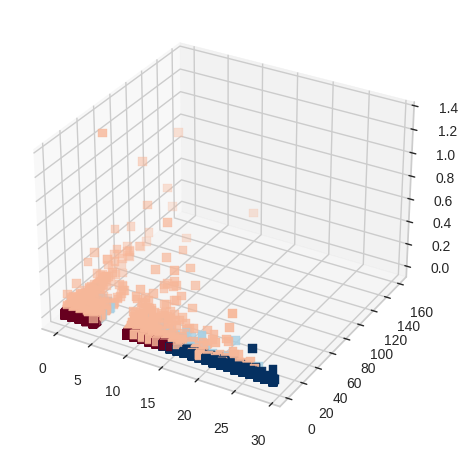

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

df = pd.DataFrame(final, columns=['Recency', 'Frequency','Monetary',"Cluster"])
print (df)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df['Recency'])
y = np.array(df['Frequency'])
z = np.array(df['Monetary'])

ax.scatter(x,y,z, marker="s", c=df["Cluster"], s=40, cmap="RdBu")

plt.show()

In [26]:
import plotly.express as px
#df = px.rfmscaled
fig = px.scatter_3d(final, x='Recency', y='Monetary', z='Frequency',
              color='Cluster')
fig.show()

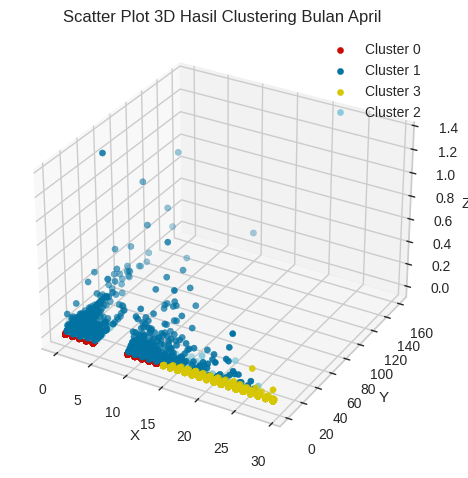

In [27]:
data = pd.DataFrame(final, columns=['Recency', 'Frequency','Monetary',"Cluster"])

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Setiap cluster akan memiliki warna yang berbeda
colors = ['r','b', 'y', 'c', 'm']

for cluster_label, color in zip(data['Cluster'].unique(), colors):
    cluster_data = data[data['Cluster'] == cluster_label]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], c=color, label=f'Cluster {cluster_label}')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Scatter Plot 3D Hasil Clustering Bulan April')
plt.legend()
plt.show()